In [1]:
# default_exp mrna_content

# mRNA content regression

> API details.

In [34]:
#hide
from nbdev.showdoc import *

In [35]:
# %load common.py
# export

import pandas
import os
import numpy
import seaborn
import logging
import matplotlib.pyplot as plt
from importlib import reload

numpy.random.seed(42)

In [36]:
# export

import fcsparser
import sklearn.linear_model
import sklearn.model_selection

In [37]:
meta, df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/non_intensity_T0234567_R123.fcs")
df_meta = df[["label", "replicate", "timepoint"]].astype(int)
df_meta["timepoint"] = df_meta["timepoint"].map(lambda a: meta["timepoint"].split(",")[a])
df_meta["replicate"] = df_meta["replicate"].map(lambda a: meta["replicate"].split(",")[a])
df = df.drop(columns=["label", "replicate", "timepoint"])

# mRNA content targets

In [41]:
_, fluor_df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/fluor_T0234567_R123.fcs")

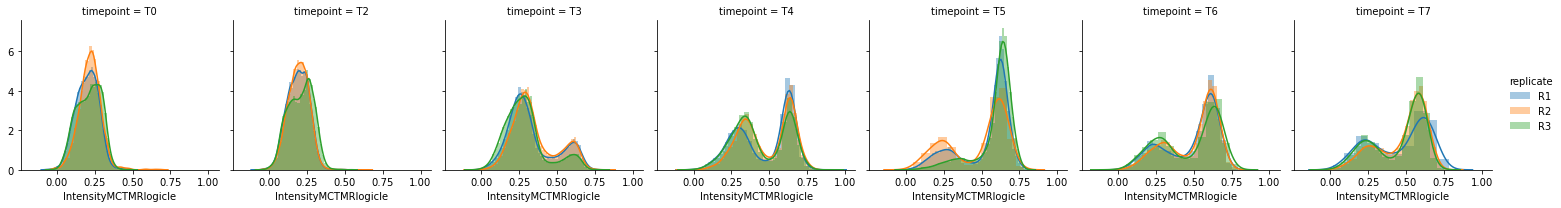

In [42]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([fluor_df, df_meta], axis=1))
grid.map(seaborn.distplot, "IntensityMCTMRlogicle")
grid.add_legend()

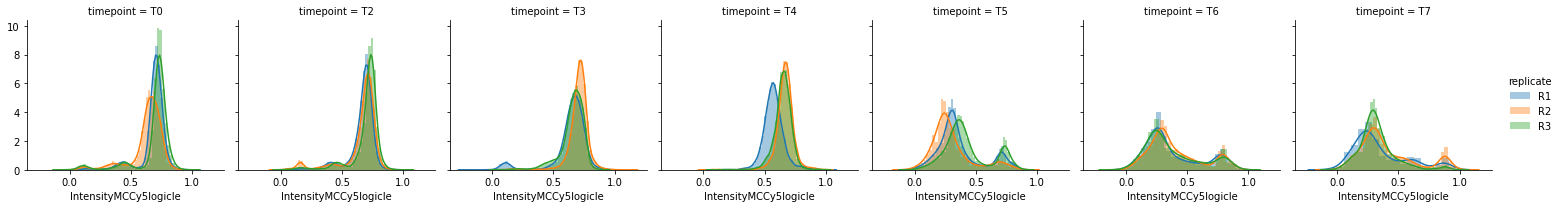

In [43]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([fluor_df, df_meta], axis=1))
grid.map(seaborn.distplot, "IntensityMCCy5logicle")
grid.add_legend()

# BF regression on targets

In [45]:
df_bf = df.filter(regex="(i?).*BF.*")

## Lasso

In [56]:
regressor = sklearn.linear_model.Lasso()
scores = sklearn.model_selection.cross_validate(regressor, df_bf, fluor_df["IntensityMCTMRlogicle"], scoring=["neg_mean_squared_error", "neg_mean_absolute_error"], return_train_score=True, verbose=4, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [57]:
scores

{'fit_time': array([0.09371519, 0.10934234, 0.15622544, 0.17187548, 0.17184734]),
 'score_time': array([0.01562715, 0.        , 0.        , 0.        , 0.01562428]),
 'test_neg_mean_squared_error': array([-0.04970444, -0.03772576, -0.03115011, -0.0540236 , -0.06434043]),
 'train_neg_mean_squared_error': array([-0.03791982, -0.0396985 , -0.04035567, -0.03580119, -0.03385194]),
 'test_neg_mean_absolute_error': array([-0.21042754, -0.17825548, -0.14944766, -0.19923399, -0.23005338]),
 'train_neg_mean_absolute_error': array([-0.17745735, -0.18100689, -0.17970029, -0.16115853, -0.15236624])}

In [60]:
numpy.mean(scores["train_neg_mean_absolute_error"]), numpy.std(scores["train_neg_mean_absolute_error"])

(-0.17033785879611968, 0.01148398644154876)

In [58]:
numpy.mean(scores["test_neg_mean_squared_error"]), numpy.std(scores["test_neg_mean_squared_error"])

(-0.04738886728882789, 0.011779728819012451)

In [59]:
numpy.mean(scores["test_neg_mean_absolute_error"]), numpy.std(scores["test_neg_mean_absolute_error"])

(-0.1934836119413376, 0.027671544971741374)